Word Count: 1392

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, PrecisionRecallDisplay,precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from tensorflow.keras import layers, models, losses, metrics
from tensorflow.keras.datasets import mnist
from tensorflow import keras

Business Problem:
A consumer credit card bank is facing the problem of customer attrition. The dataset contains a series of customer data including demographic characteristics and and historical activities, along with a variable 'Attrition_Flag' to label existing customer or attrited customer. The dataset is downloaded from Kaggle: https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn/data

Overall Strategy:
The object is to build a predictive model to predict whether a customer will become attrited or not based on the information in the dataset. For those customers who are labeled as potentially attrited customer by the model, the bank could implement a series of customer retention strategies to prevent customer loss. For example, the bank could offer them discount on annual fee/interest rate or limited time bonus etc. 

# Get the Data 

## Download the Data

In [4]:
data=pd.read_csv('credit_card_churn.csv')
data = data.iloc[:, 1:-2] #Delete last two column advised by the dataset publication

## Take a quick look at the data structure

In [5]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

No Null value found in the dataset

In [7]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


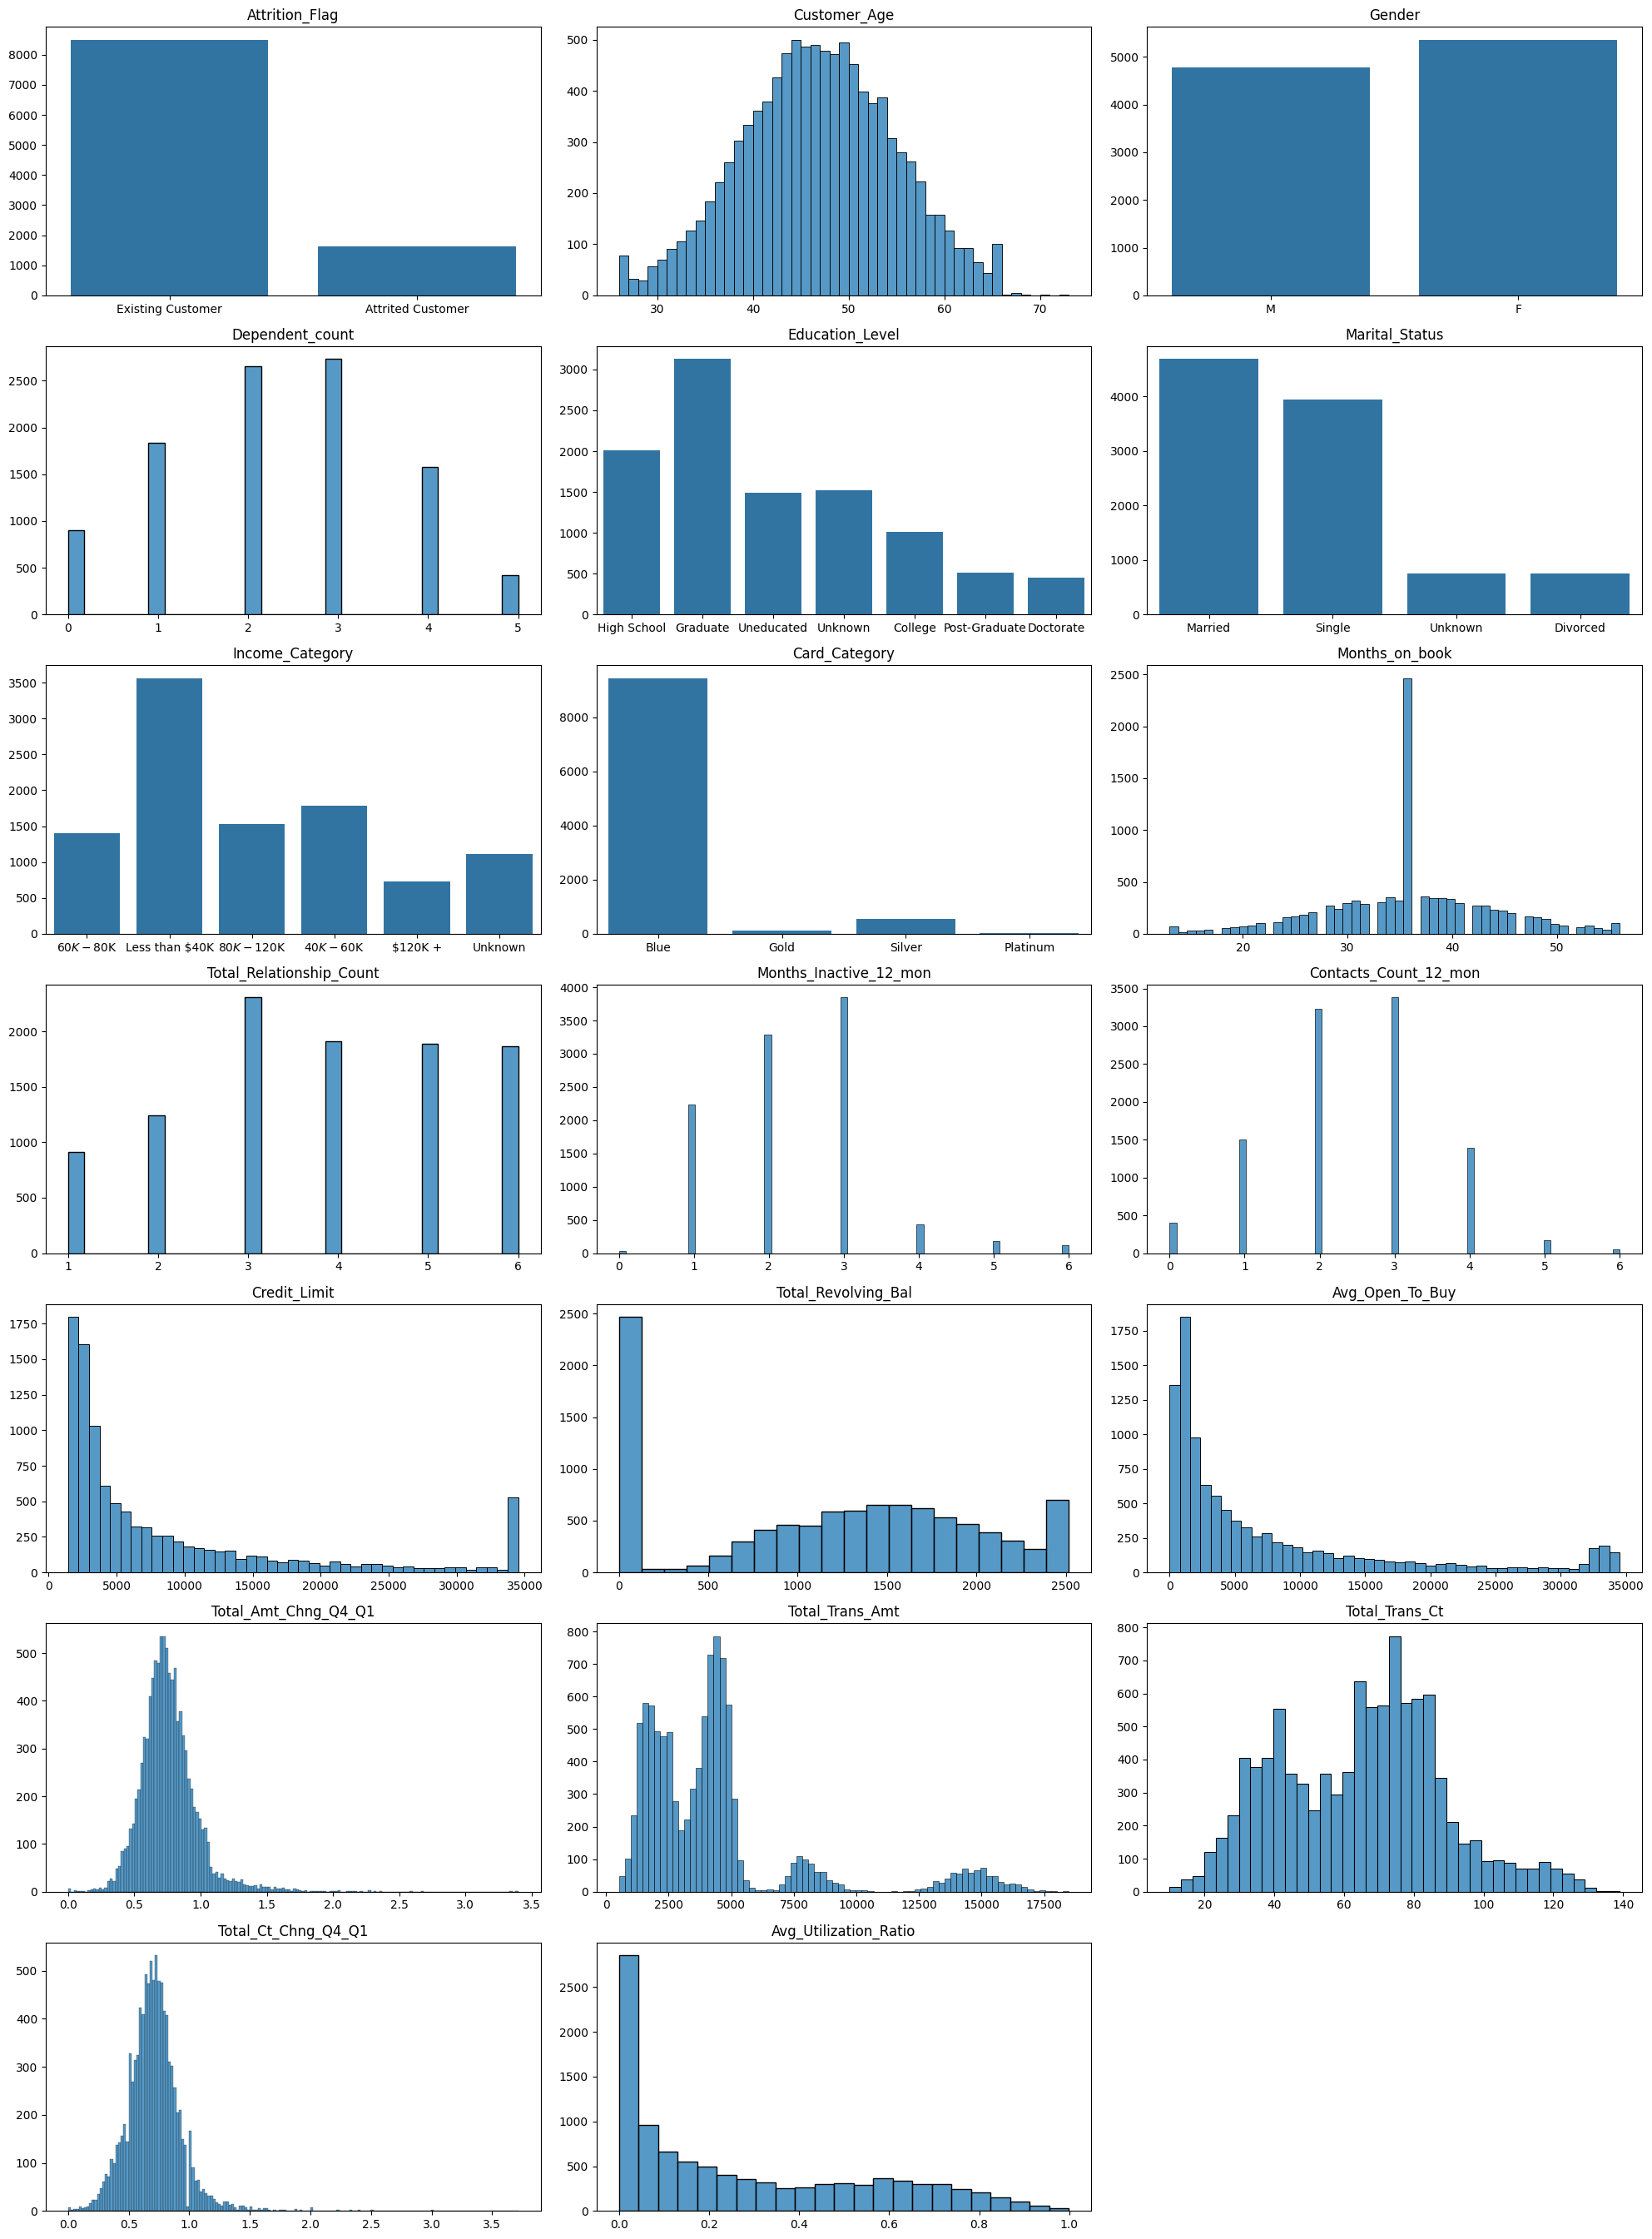

In [8]:
# Plot distributions for all variables
plt.figure(figsize=(20, 27))
for i, col in enumerate(data.columns):
    plt.subplot(7, 3, i+1) 
    if data[col].dtype == 'object':
        sns.countplot(x=data[col], data=data)  # countplot for categorical variables
    else:
        sns.histplot(data[col])  # histplot for numerical variables
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()  
plt.show()

In [9]:
# Count the number of existing customers and calculate the percentage of exsiting customers in the datset
existing_count=data[(data['Attrition_Flag']=='Existing Customer')]
existing_per = existing_count.shape[0]/data.shape[0]
attrition_per = 1-existing_per
print(existing_per)
print(attrition_per)

0.8393403772094401
0.1606596227905599


From the first plot, I noticed that the dataset may have imbalanced classes since 84% of the sample are exsiting customers and only 16% are attrited customers. With the imbalanced classes, a model could get a pretty high accuracy just by predicting the majority class, but it may fail to capture the minority class. Below are some techiniques to solve the imlalanced classes:  
   1. Resampling techniques like undersampling or oversampling (undersampling discards potentially useful information and oversampling increases the likelihood of overfitting since it replicates the minority class event)  
   2. Use various performance metrics: accuracy can be misleading for imbalanced datasets. Confustion matrix, persision, recall, F1 score, and area under ROC curve could be used for model evaluation as well  
   3. Penalize algorithms (cost-Sensitive training) that increase the cost of classification mistakes in the minority class like Penalized-SVM and Weighted XGBoost  
   4. Use ensemble algorithms which performs well on imlalanced data like random forests and gradient boosted trees  

Techinique 2,3,4 will be used in this project to solve imbalanced classes after analyzing the pros and cons of the 4 opitons. 

## Create a test set

In [10]:
# Split the data into train(80%) and test(20%) set
# The train set will be used in model training, and the test set will be used to generate predicted value and assess model performance
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42) # set the random seed to ensure the same output every time
print(len(train_set))
print(len(test_set))

8101
2026


# Discover and Visualize the Data to Gain Insights

## Countplot plots of categorical variables by attrition flags
I want to see whether categorical variables have the same distribution for existing and attrited customers

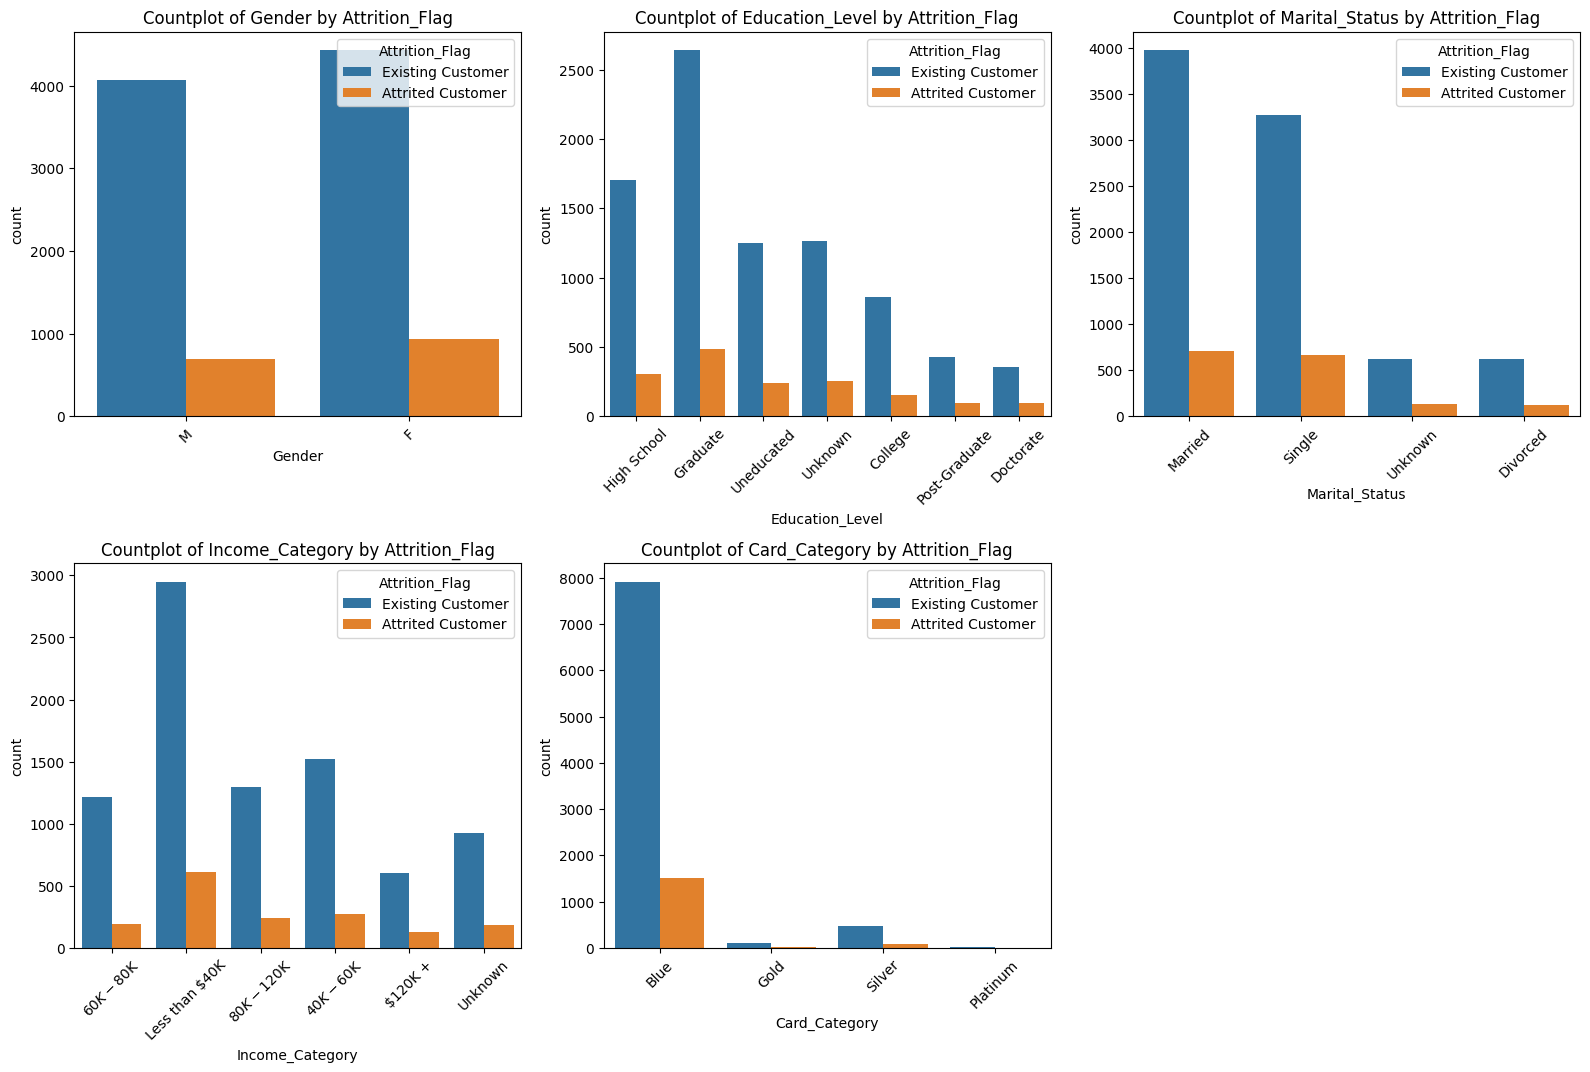

In [11]:
df_categorical = data.select_dtypes(include='object').drop(columns=['Attrition_Flag']) # Generate a set of categorical variables
plt.figure(figsize=(16, 15))
for i, column in enumerate(df_categorical.columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='Attrition_Flag', data=data)
    plt.title(f'Countplot of {column} by Attrition_Flag')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Some preliminary insights from EDA:  
   1. Married people are more likely to hold the card, followed by singles  
   2. Customers with graduate degree are more likely to hold the card, compared with other degrees  
   3. People whose income less than $40k are most likely to subscribe to the credit card  

## Box plots of numerical variables by attrition flags
I want to see whether numerical variables have the same distribution for existing and attrited customers

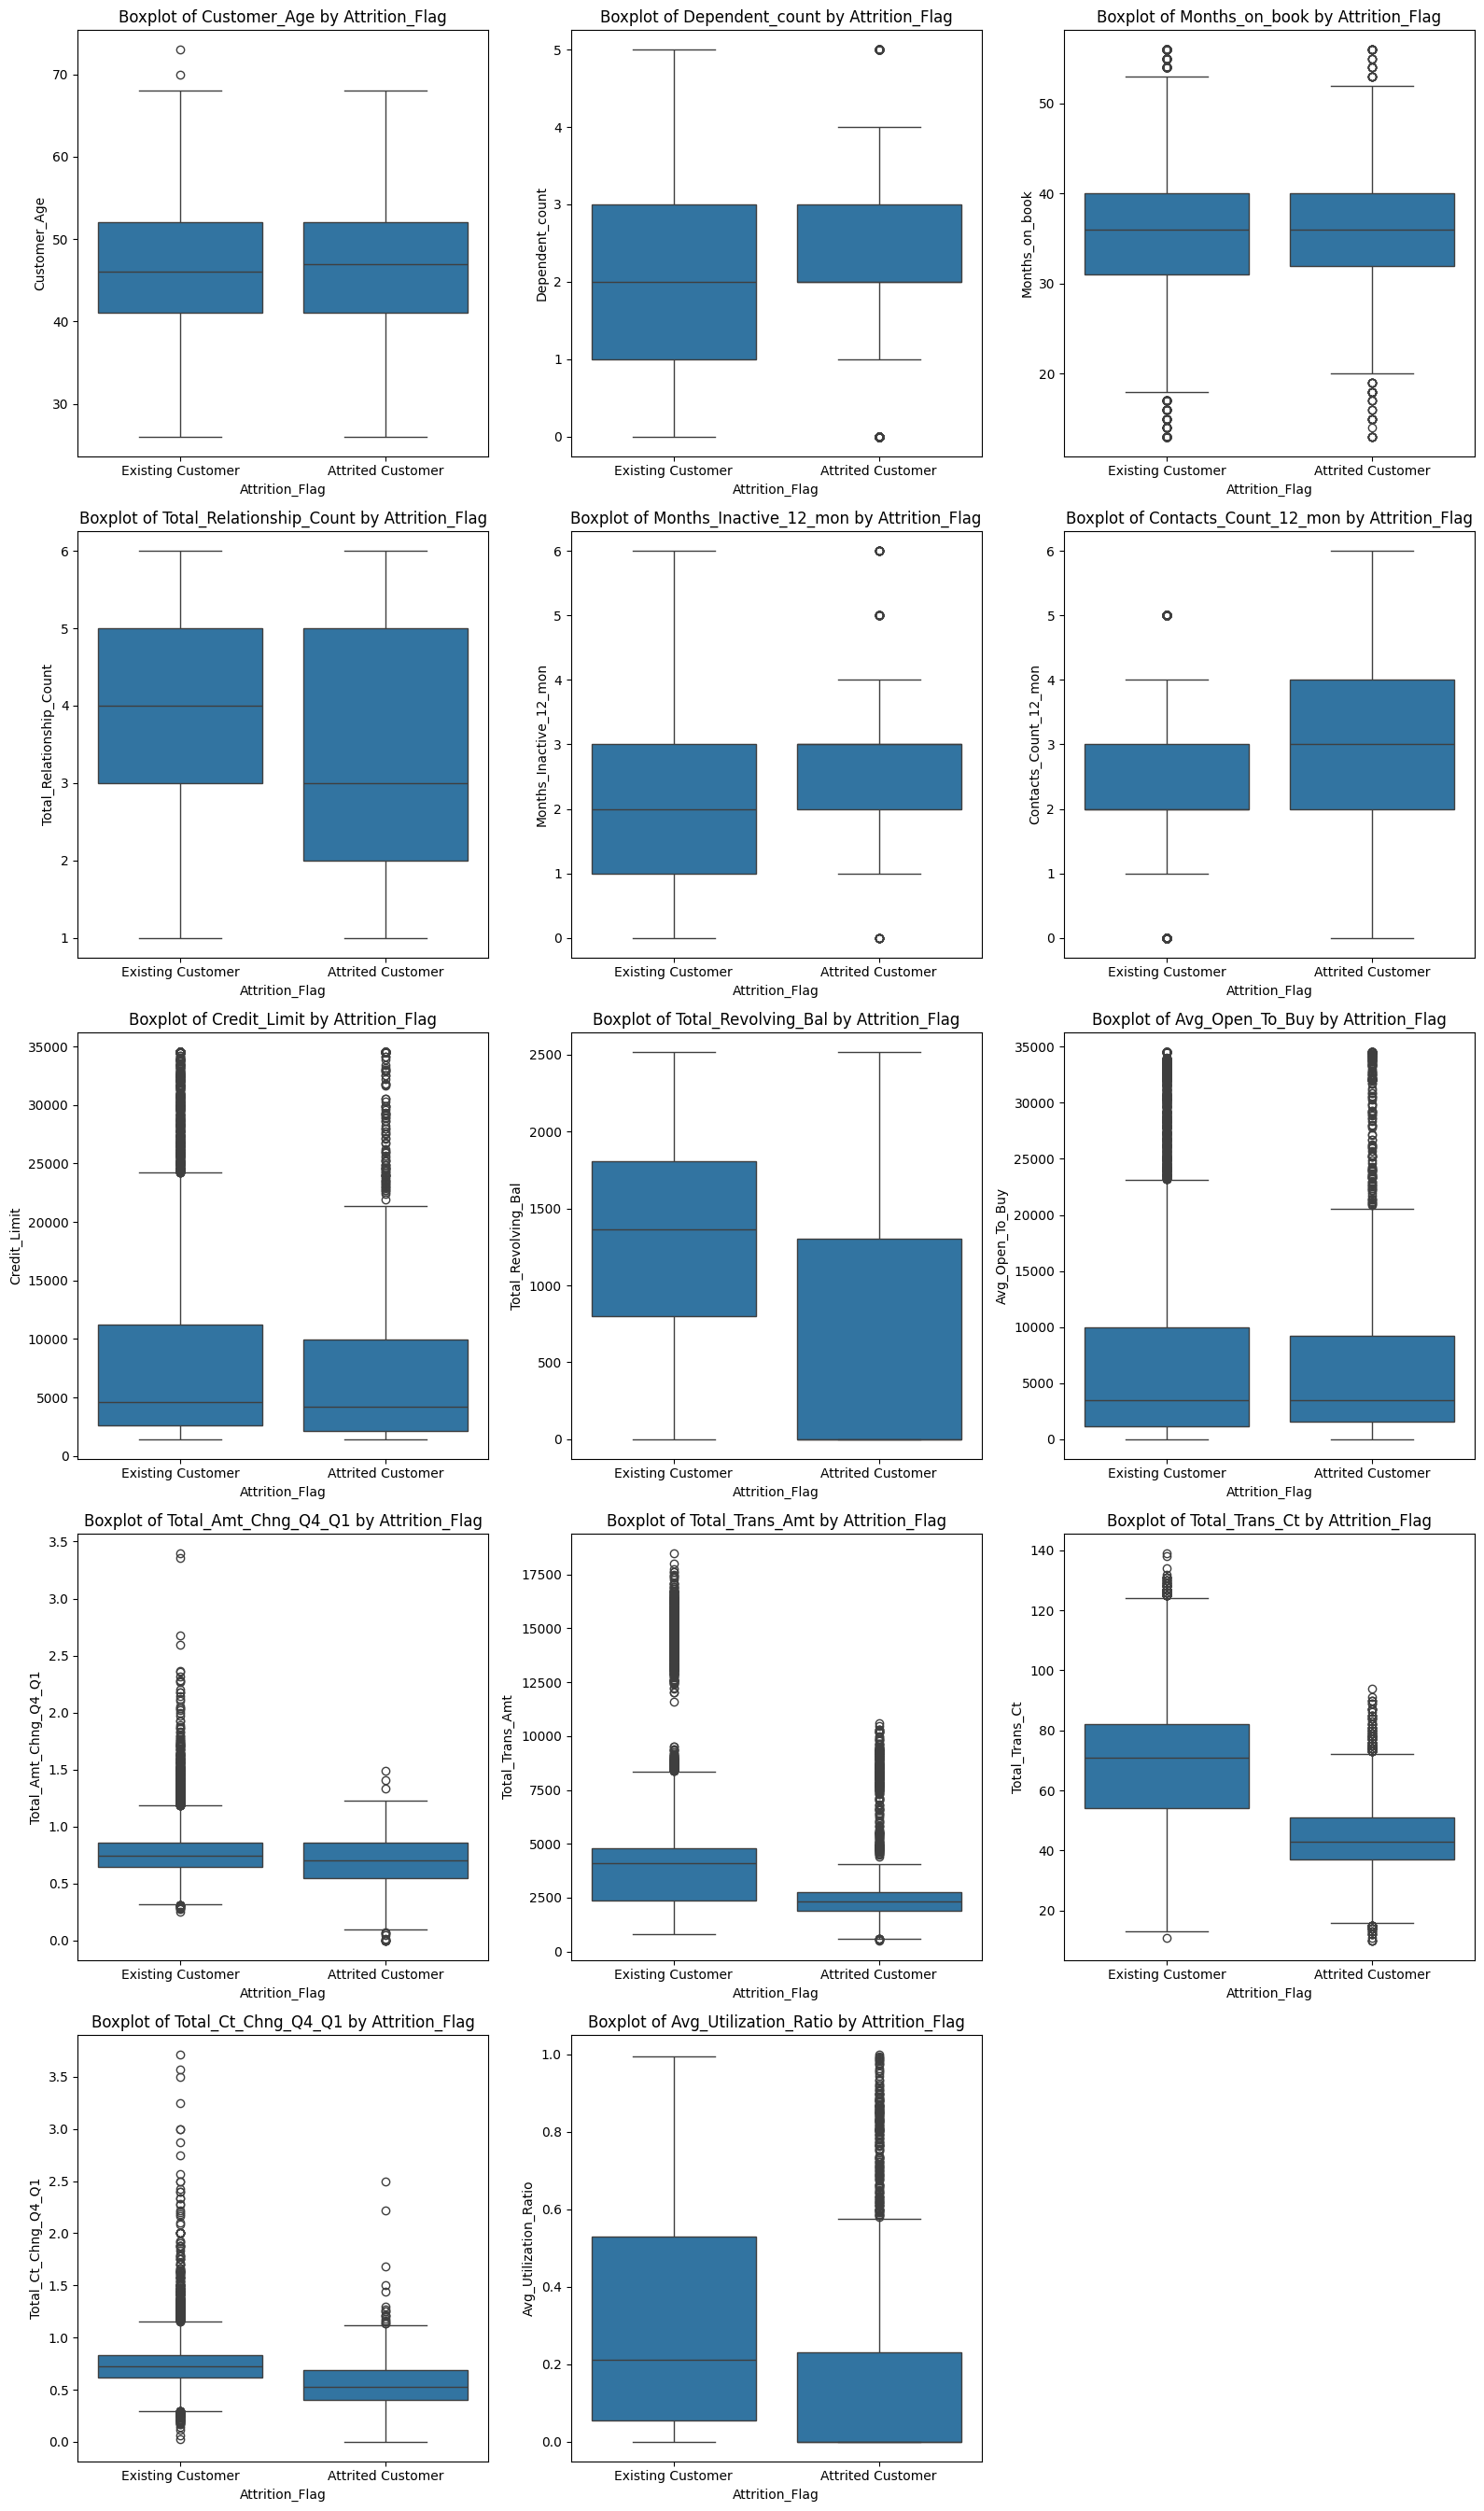

In [12]:
df_numerical = data.select_dtypes(include=['int64', 'float64']) # Generate a set of numerical variables
plt.figure(figsize=(16, 27))
num_cols = len(df_numerical.columns)
rows = 5
cols = num_cols // rows + (num_cols % rows > 0)

for i, column in enumerate(df_numerical.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='Attrition_Flag', y=column, data=data)
    plt.title(f'Boxplot of {column} by Attrition_Flag')
plt.tight_layout()
plt.show()

Some preliminary insights from EDA:  
   1. Attrited customers tend to have less product with the bank  
   2. Attrited customers tend to have more contacts with the bank in last 12 month   
   3. Attrited customers tend to have lower revalving balance and less transactions   

## Looking for Correlations

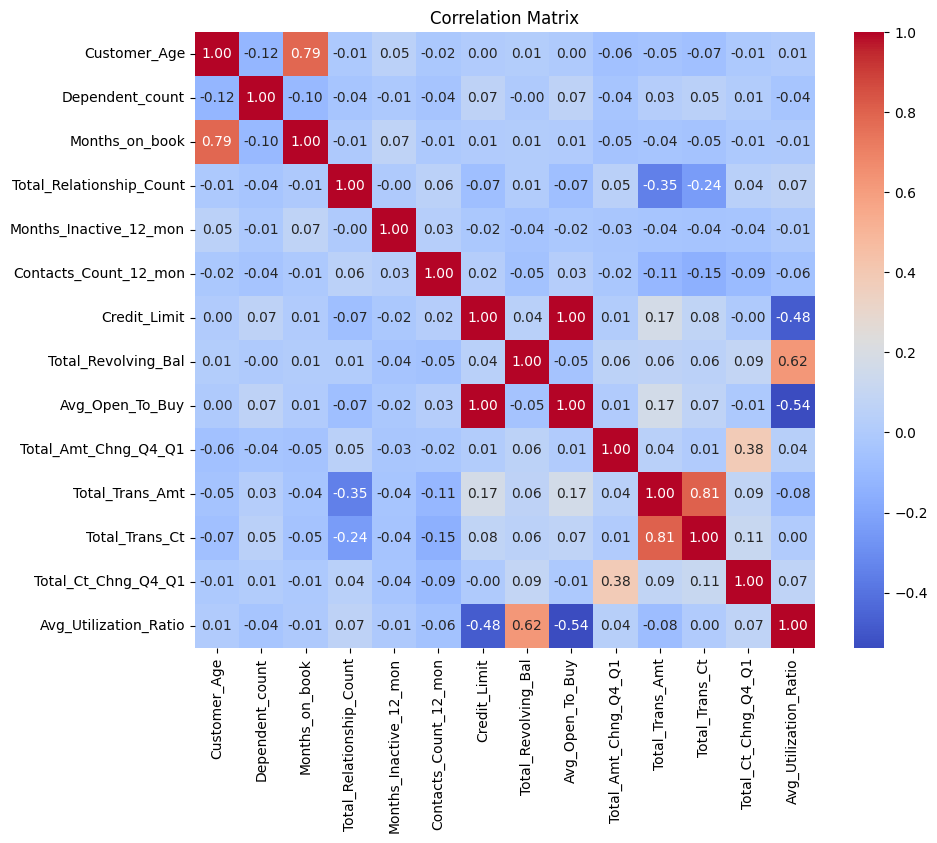

In [13]:
# Plot correation matrix for all numerical variables 
corr_matrix = df_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Three pairs of variables have high correlation(>=0.7) : Avg_Open_To_Buy & Credit_Limit, Months_on_book & Customer_Age, Total_Trans_Ct & Total_Trans_Amt. Scatter plot will be plotted to further investigate the correlation.

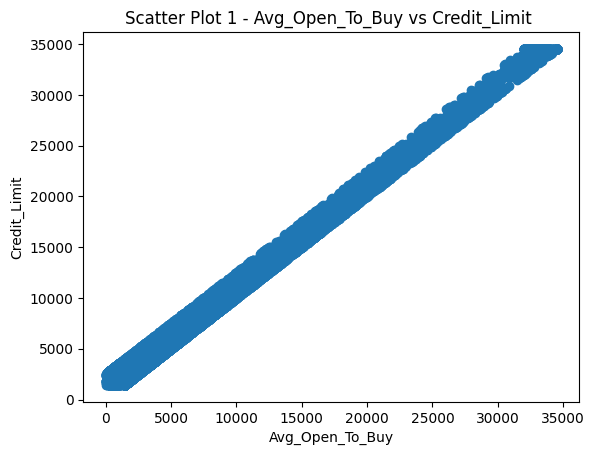

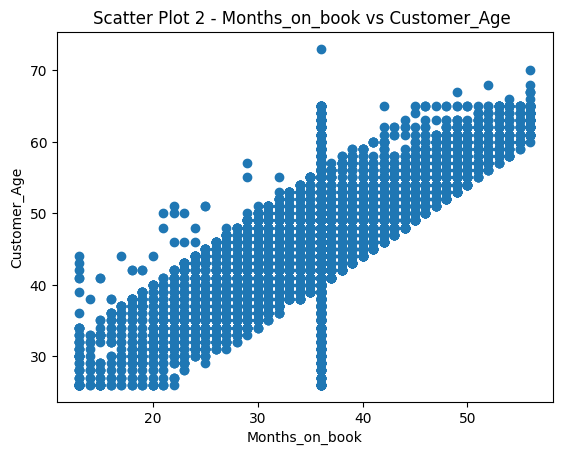

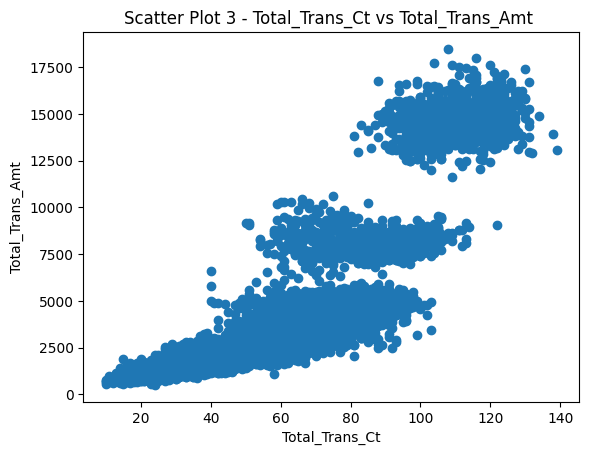

In [14]:
plt.scatter(df_numerical['Avg_Open_To_Buy'], df_numerical['Credit_Limit'])
plt.xlabel('Avg_Open_To_Buy')
plt.ylabel('Credit_Limit')
plt.title('Scatter Plot 1 - Avg_Open_To_Buy vs Credit_Limit ')
plt.show()

plt.scatter(df_numerical['Months_on_book'], df_numerical['Customer_Age'])
plt.xlabel('Months_on_book')
plt.ylabel('Customer_Age')
plt.title('Scatter Plot 2 - Months_on_book vs Customer_Age ')
plt.show()

plt.scatter(df_numerical['Total_Trans_Ct'], df_numerical['Total_Trans_Amt'])
plt.xlabel('Total_Trans_Ct')
plt.ylabel('Total_Trans_Amt')
plt.title('Scatter Plot 3 - Total_Trans_Ct vs Total_Trans_Amt ')
plt.show()


Due to the high colinearity indicated in the scatter plots above, I decide to delete Avg_Open_To_Buy, Customer_Age, and Total_Trans_Amt to reduce redundancy and improve stability and generalization of the model

In [15]:
columns_to_exclude = ['Customer_Age','Avg_Open_To_Buy','Total_Trans_Amt']
data_new = data.drop(columns=columns_to_exclude)

# Prepare the Data for Machine Learning Algorithms


In [16]:
#Count number of rows that have at least one 'Unkown' value
filtered_df=data_new[(data_new['Income_Category']=='Unknown')|
                     (data_new['Education_Level']=='Unknown')|
                     (data_new['Marital_Status']=='Unknown')]
num_rows = filtered_df.shape[0]
print(num_rows)

3046


## Data cleaning
 Education_Level, Marital_Status, and Income_Category have 'Unknown' value, and there are 3046(~30% of the data) rows with at least one 'Unknown' value. 
There are several strategies dealing with 'Unkown' values:
   1. Delete rows with 'Unknown' value
   2. Replace with the mean, median, or mode of the respective feature. This is typically used for numerical features
   3. Use machine learning algorithms to predict missing values based on other features. i.e. XGBoost

Giving large size of the dataset, I will chose option 1 to delete rows with missing values. If good results couldn't be obtained with the new dataset, I will seek other techniques for these 'Unknown' values.

In [17]:
# Option 1 : Delete rows with 'Unknown' value
data_opt1 = data_new[(data_new['Income_Category'] != 'Unknown') & 
                     (data_new['Education_Level'] != 'Unknown') & 
                     (data_new['Marital_Status'] != 'Unknown')].copy()

In [18]:
# ## Option 2: Replace 'Unknown' value with mode
# data_opt2=data_new.copy()
# mode_education= data_opt2['Education_Level'].mode()[0]
# mode_marital= data_opt2['Marital_Status'].mode()[0]
# mode_income= data_opt2['Income_Category'].mode()[0]
# data_opt2['Education_Level']=data_opt2['Education_Level'].replace('Unknown',mode_education)
# data_opt2['Marital_Status']=data_opt2['Marital_Status'].replace('Unknown',mode_marital)
# data_opt2['Income_Category']=data_opt2['Income_Category'].replace('Unknown',mode_income)
# data_opt2.info()

In [19]:
# Create rpreprocessor for x variables
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numeric_features = ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
preprocessor = ColumnTransformer(
    transformers=
    [
        ('num', StandardScaler(), numeric_features),  # standardize numerical variables
        ('cat', OneHotEncoder(), categorical_features)  # encode categorical variables   
    ])

#  Since LabelEncoder() will encode on alphabet order, attrited customers will be encoded 0. 
# I want to label attrited customers as positive(1), so I manually encode the y variable.
data_opt1['Attrition_Flag']=data_opt1['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1}).astype(int)

/var/folders/t7/j5jl86t54kjg319qghzc7l_h0000gn/T/ipykernel_68206/1586075494.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_opt1['Attrition_Flag']=data_opt1['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1}).astype(int)


In [20]:
data_opt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   int64  
 1   Gender                    7081 non-null   object 
 2   Dependent_count           7081 non-null   int64  
 3   Education_Level           7081 non-null   object 
 4   Marital_Status            7081 non-null   object 
 5   Income_Category           7081 non-null   object 
 6   Card_Category             7081 non-null   object 
 7   Months_on_book            7081 non-null   int64  
 8   Total_Relationship_Count  7081 non-null   int64  
 9   Months_Inactive_12_mon    7081 non-null   int64  
 10  Contacts_Count_12_mon     7081 non-null   int64  
 11  Credit_Limit              7081 non-null   float64
 12  Total_Revolving_Bal       7081 non-null   int64  
 13  Total_Amt_Chng_Q4_Q1      7081 non-null   float64
 14  Total_Trans_

# Select and Train a Model

In [21]:
# Define the explantory and dependent variables and the train and test set
columns_to_exclude = ['Attrition_Flag']
X = data_opt1.drop(columns=columns_to_exclude)
y=data_opt1['Attrition_Flag']
#Split the data set into train(80%) and test(20%) dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 
print(len(X_train),len(X_test)) # Print the size of train and test dataset

5664 1417


In [22]:
#Preprocess the X_train and X_test datasets
X_train_preproc = preprocessor.fit_transform(X_train)
X_test_preproc = preprocessor.transform(X_test)

## Logistic Regression

In [23]:
# Fit the logistic regression model using the train set
log_reg=LogisticRegression()
log_reg.fit(X_train_preproc, y_train)

LogisticRegression()

In [24]:
#Use the trained model to predict y value
y_pred_lr=log_reg.predict(X_test_preproc)

#Calculate y_score for AUC 
y_score_lr = log_reg.predict_proba(X_test_preproc)[:, 1]


In [25]:
#Generate performance metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)
auc_lr=roc_auc_score(y_test, y_score_lr)

print(f"Test accuracy: \n  {accuracy_lr:.2%}")
print ("Confusion Matrix : \n", conf_matrix_lr)  
print("\nClassification Report: : \n",classification_rep_lr)
print(f"AUC: \n  {auc_lr:.2%}")

Test accuracy: 
  90.26%
Confusion Matrix : 
 [[1169   36]
 [ 102  110]]

Classification Report: : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.75      0.52      0.61       212

    accuracy                           0.90      1417
   macro avg       0.84      0.74      0.78      1417
weighted avg       0.89      0.90      0.89      1417

AUC: 
  90.92%


The logistic regression model has a 90.26% accuracy which is pretty high. However, I noticed that the model has a very high f1-score for the majority class(0 or existing customers) but a low f1-score for the minority class(1 or attrited customers). 
The object of the project is to model to identify the potential attrited customers, so I want to reduce the false negative cases(attrited but predicted as existing). As a result, a model with a high recall rate (TP/(TP+FN)) is desired. Clearly, the logistic model with 52% recall rate is not satisfying.

## Penalized-SVM

Increasing the cost of classification mistakes in the minority class is a technique to deal with dataset with inbalanced classese.  A popular algorithm is Penalized-SVM. During training, the argument class_weight=’balanced’ could be used to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

In [26]:
# Fit the model
svc = SVC(class_weight='balanced' ,probability=True) 
#class_weight='balanced' to penalize mistakes on the minority class by an amount proportional to how under-represented it is.
svc.fit(X_train_preproc, y_train)

SVC(class_weight='balanced', probability=True)

In [27]:
# Generate the predicted y value and calculate the y_score
y_pred_svc=svc.predict(X_test_preproc)
y_score_svc= svc.predict_proba(X_test_preproc)[:, 1]

In [28]:
#Generate performance metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
classification_rep_svc = classification_report(y_test, y_pred_svc)
auc_svc=roc_auc_score(y_test, y_score_svc)

print(f"Test accuracy: \n  {accuracy_svc:.2%}")
print ("Confusion Matrix : \n", conf_matrix_svc) 
print("\nClassification Report: : \n",classification_rep_svc)
print(f"AUC: \n  {auc_svc:.2%}")

Test accuracy: 
  89.98%
Confusion Matrix : 
 [[1094  111]
 [  31  181]]

Classification Report: : 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1205
           1       0.62      0.85      0.72       212

    accuracy                           0.90      1417
   macro avg       0.80      0.88      0.83      1417
weighted avg       0.92      0.90      0.91      1417

AUC: 
  95.11%


Even though the test accuracy of the Penalized-SVM model is a little bit lower than the Logistic Regression model, the AUC slightly increases and the recall rate increases significantly by 33%. However, the precision(TP/(TP+FP)) of the model is only 62%, which means ~40% of the attrited customers predicted by the model are exsiting customers. Offering discount/bonus to these customers may lead to profit reduction.

## Random Forest

In [29]:
# Fit the model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_preproc, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Generate the predicted y value and calculate the y_score
y_pred_rf=random_forest.predict(X_test_preproc)
y_score_rf = random_forest.predict_proba(X_test_preproc)[:, 1]

In [31]:
#Generate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
auc_rf=roc_auc_score(y_test, y_score_rf)

print(f"Test accuracy: \n  {accuracy_rf:.2%}")
print ("Confusion Matrix : \n", conf_matrix_rf)  
print("\nClassification Report: : \n",classification_rep_rf)
print(f"AUC: \n  {auc_rf:.2%}")

Test accuracy: 
  92.94%
Confusion Matrix : 
 [[1181   24]
 [  76  136]]

Classification Report: : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1205
           1       0.85      0.64      0.73       212

    accuracy                           0.93      1417
   macro avg       0.89      0.81      0.85      1417
weighted avg       0.93      0.93      0.93      1417

AUC: 
  95.79%


Even though the Random Forest model has a higher accuracy and AUC compared to the Penalized-SVM model, the recall rate (64%) is pretty low.

## XGBoost

Extreme Gradient Boosting(XGBoost) is a machine-learning algorithm based on the gradient boosting(GBM) algorithm. However, a few differences of XGBoost make it better than GBM in terms of performance and speed.
   1. Regularization: XGBoost implements regularization in its alogrithm to avoid overfitting, whereas GBM doesn't.
   2. Parallelization: GBM tends to have a slower training time than the XGBoost because the latter algorithm implements parallelization during the training process.
   3. Missing Data Handling: XGBoost has its own in-built missing data handler, whereas GBM doesn’t.
   4. In-Built Cross-Validation: XGBoost has an in-built Cross-Validation that could improve the model generalization and robustness.

In [32]:
# Fit the model
xgboost = XGBClassifier() 
# scale_pos_weight can be used to train a class-weighted or cost-sensitive version of XGBoost for imbalanced classification.
# a fast way to estimate this value using # majority class/ # minority class. Based on the data exploration, I have 84%/16%=5.25
xgboost.fit(X_train_preproc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
# Generate the predicted y value and calculate the y_score
y_pred_xgb = xgboost.predict(X_test_preproc)
y_score_xgb = xgboost.predict_proba(X_test_preproc)[:, 1]

In [34]:
#Generate performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
auc_xgb=roc_auc_score(y_test, y_score_xgb)

print(f"Test accuracy: \n  {accuracy_xgb:.2%}")
print ("Confusion Matrix : \n", conf_matrix_xgb)  
print("\nClassification Report: : \n",classification_rep_xgb)
print(f"AUC: \n  {auc_xgb:.2%}")

Test accuracy: 
  93.72%
Confusion Matrix : 
 [[1167   38]
 [  51  161]]

Classification Report: : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1205
           1       0.81      0.76      0.78       212

    accuracy                           0.94      1417
   macro avg       0.88      0.86      0.87      1417
weighted avg       0.94      0.94      0.94      1417

AUC: 
  96.89%


XGBoost has a highest test accuracy, f1 score, and AUC among all models.

## MLP

In [36]:
# Define MLP model
mlp = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_preproc.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


# Compile the model
mlp.compile(optimizer='sgd',
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.AUC()]) # Use AUC as the metrics

# Train the model
mlp.fit(X_train_preproc, y_train, epochs=250, batch_size=128)

Epoch 1/250


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - auc: 0.5532 - loss: 0.6147
Epoch 2/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - auc: 0.6831 - loss: 0.4605
Epoch 3/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - auc: 0.7568 - loss: 0.4030
Epoch 4/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - auc: 0.7955 - loss: 0.3711
Epoch 5/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - auc: 0.8160 - loss: 0.3541
Epoch 6/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - auc: 0.8325 - loss: 0.3518
Epoch 7/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - auc: 0.8365 - loss: 0.3282
Epoch 8/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - auc: 0.8503 - loss: 0.3343
Epoch 9/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - auc: 0.8564 - loss: 0.3190
Epoch 10/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - auc: 0.8759 - loss: 0.3150
Epoch 11/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - auc: 0.8676 - loss: 0.3071
Epoch 12/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - auc: 0.8815 - loss: 0.3015
Epoch 13/250
45/45 ━━━━━━

In [37]:
# Generate the predicted probability of y 
y_score_mlp = mlp.predict(X_test_preproc)

# Convert probability to y value
y_pred_mlp = (y_score_mlp > 0.5).astype(int)

# Generate the test loss and AUC 
test_loss, auc_mlp=mlp.evaluate(X_test_preproc, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - auc: 0.9505 - loss: 0.1855


In [38]:
#Generate performance metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)
# auc_mlp=roc_auc_score(y_test, y_score_mlp)

print(f"Test accuracy: \n  {accuracy_mlp:.2%}")
print ("Confusion Matrix : \n", conf_matrix_mlp)  
print("\nClassification Report: : \n",classification_rep_mlp)
print(f"AUC: \n  {auc_mlp:.2%}")

Test accuracy: 
  92.52%
Confusion Matrix : 
 [[1174   31]
 [  75  137]]

Classification Report: : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1205
           1       0.82      0.65      0.72       212

    accuracy                           0.93      1417
   macro avg       0.88      0.81      0.84      1417
weighted avg       0.92      0.93      0.92      1417

AUC: 
  94.09%


## Model Selection

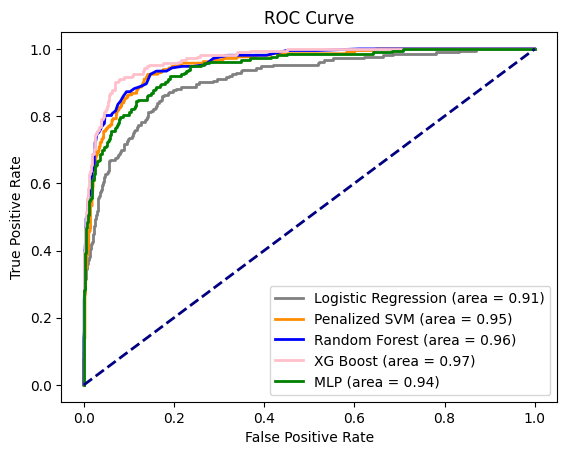

In [39]:
# Calculate ROC Curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_score_lr)
fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_score_svc)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_score_rf)
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_score_xgb)
fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, y_score_mlp)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='gray', lw=2, label='Logistic Regression (area = %0.2f)' % auc_lr)
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='Penalized SVM (area = %0.2f)' % auc_svc)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='pink', lw=2, label='XG Boost (area = %0.2f)' % auc_xgb)
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label='MLP (area = %0.2f)' % auc_mlp)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

XG Boos has the best performance based on the AUC and F1 score. As a result, I want to select the XGBoost and fine-tune the model to get a higer recall if possible.

# Fine-Tune the Model

## Grid Search

In this section, I want to search the optimized scale_pos_weight which is a hyperparameter in XGBoost with the effect of weighing the balance of positive examples(minority class), relative to negative examples(majority class) when boosting decision trees. It has by default value 1. A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution. For example, for a dataset with a 1 to 100 ratio for examples in the minority to majority classes, the scale_pos_weight can be set to 100. This will give classification errors made by the model on the minority class 100 times more impact, and in turn, 100 times more correction than errors made on the majority class.

In [40]:
# Preprocess X variables
X_preproc = preprocessor.transform(X)
# Define model
model = XGBClassifier()
# Define grid - all integers between 1 and 100
weights = list(range(1, 101))
param_grid = dict(scale_pos_weight=weights)
# Define evaluation procedure 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# Define grid search based on different scoring method(recall,precision,f1 score, accuracy, AUC)
grid_recall = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')
grid_precision = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='precision')
grid_f1 = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')
grid_accuracy = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_auc = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Execute the grid search
grid_result_recall = grid_recall.fit(X_preproc,y)
grid_result_precision = grid_precision.fit(X_preproc,y)
grid_result_f1 = grid_f1.fit(X_preproc,y)
grid_result_accuracy = grid_accuracy.fit(X_preproc,y)
grid_result_auc = grid_auc.fit(X_preproc,y)

# Save the mean core by different weight
means_recall = grid_result_recall.cv_results_['mean_test_score']
means_precision = grid_result_precision.cv_results_['mean_test_score']
means_f1 = grid_result_f1.cv_results_['mean_test_score']
means_accuracy = grid_result_accuracy.cv_results_['mean_test_score']
means_auc = grid_result_auc.cv_results_['mean_test_score']

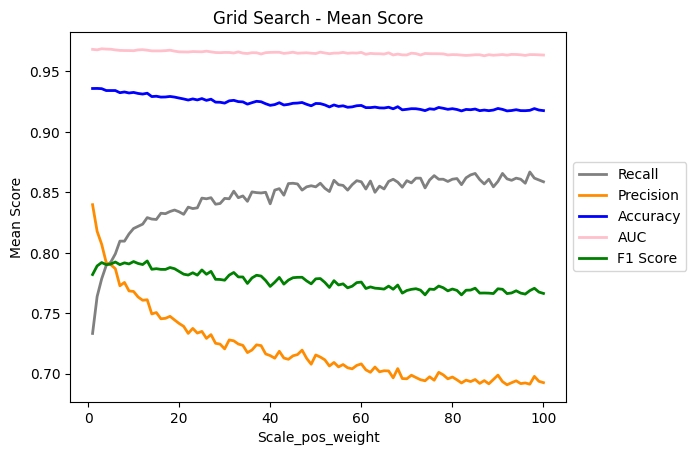

In [41]:
# Plot the mean score by different weight
plt.figure()
plt.plot(weights, means_recall, color='gray', lw=2, label='Recall')
plt.plot(weights, means_precision, color='darkorange', lw=2, label='Precision' )
plt.plot(weights, means_accuracy, color='blue', lw=2, label='Accuracy')
plt.plot(weights, means_auc, color='pink', lw=2, label='AUC' )
plt.plot(weights, means_f1, color='green', lw=2, label='F1 Score')

plt.xlabel('Scale_pos_weight')
plt.ylabel('Mean Score')
plt.title('Grid Search - Mean Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

From the plot above, I observed that averaged recall(TP/(TP+FN)) increases as the scale_pos_weight increases, which means the model becomes more powerful to identify the attrited customers as scale_pos_weight increases. However, the precision decreases as the scale_pos_weight increases because the increase in penalty on minority samples may lead the model to classify more samples as positive, thereby increasing the false positive rate and decreasing precision, and also accuracy and AUC.

In this project, the bank wants to identify potential attrited customers and take actions to avoid customer loss, but the bank doesn't want to give ' win back offer' to too many existing customers since the offers reduces their profit. As a result, I want to find a balance between recall and precision in the model, and the f1 score could be a good metric as it is the weighted average of recall and precision.

In [42]:
# Report the best configuration
print("Best: %f using %s" % (grid_result_f1.best_score_, grid_result_f1.best_params_))

Best: 0.793146 using {'scale_pos_weight': 13}


## Evaluate the Model on the Test Set

In [43]:
# Fit the model
xgboost = XGBClassifier(scale_pos_weight=13) 
xgboost.fit(X_train_preproc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
# Generate the predicted y value and calculate the y_score
y_pred_xgb = xgboost.predict(X_test_preproc)
y_score_xgb = xgboost.predict_proba(X_test_preproc)[:, 1]

In [45]:
#Generate performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
auc_xgb=roc_auc_score(y_test, y_score_xgb)

print(f"Test accuracy: \n  {accuracy_xgb:.2%}")
print ("Confusion Matrix : \n", conf_matrix_xgb)  
print("\nClassification Report: : \n",classification_rep_xgb)
print(f"AUC: \n  {auc_xgb:.2%}")

Test accuracy: 
  93.15%
Confusion Matrix : 
 [[1142   63]
 [  34  178]]

Classification Report: : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1205
           1       0.74      0.84      0.79       212

    accuracy                           0.93      1417
   macro avg       0.85      0.89      0.87      1417
weighted avg       0.94      0.93      0.93      1417

AUC: 
  97.01%


# Conclusion
I have successfully trained a model with an accuracy of 93.15% and an AUC of 97.01%. This model can effectively identify 84% of customers who will close their credit cards. However, within the customers identified as attrited, 26% actually do not close their cards. A trade-off relationship is observed between the precision and recall of this model. Therefore, further evaluation is needed to compare the cost of customer churn with the reduction in profit from offering promotions to customers who will not churn. If the cost of customer churn is greater,   the model's scale_pos_weight should be increased to improve its recall. Conversely, if the reduction in profit from offering promotions to customers who will not churn is greater, the model's scale_pos_weight should be adjusted downwards to improve precision.